### Importing the libraries

In [129]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import json
import os
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('tagsets')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import math
import datetime
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-d

### Setting up path and filelist parameters

In [2]:
path = "D:\Courses\Spring 2019\ETA\Project\steam_reviews-master\data\\"                                  
file_list = [x for x in os.listdir("D:\Courses\Spring 2019\ETA\Project\steam_reviews-master\data\\") if x.endswith(".jsonlines")]

In [3]:
path

'D:\\Courses\\Spring 2019\\ETA\\Project\\steam_reviews-master\\data\\'

In [4]:
file_list

['Arma_3.jsonlines',
 'Counter_Strike.jsonlines',
 'Counter_Strike_Global_Offensive.jsonlines',
 'Dota_2.jsonlines',
 'Football_Manager_2015.jsonlines',
 'Garrys_Mod.jsonlines',
 'Grand_Theft_Auto_V.jsonlines',
 'Sid_Meiers_Civilization_5.jsonlines',
 'Team_Fortress_2.jsonlines',
 'The_Elder_Scrolls_V.jsonlines',
 'Warframe.jsonlines']

### Reading all source jsonline files(F0) to a pandas dataframe(F1) format 

In [5]:
rev_all = pd.DataFrame()
for file in file_list:
    revision_file = str(path) + str(file)
    with open(revision_file) as f:
        data = []
        for line in f:
            data.append(json.loads(line))
    rev_new = json_normalize(data)
    rev_new['file'] = file
    frames = [rev_all, rev_new]
    rev_all = pd.concat(frames)

In [6]:
rev_all.shape

(79437, 30)

In [7]:
rev_all

,achievement_progress.num_achievements_attained,achievement_progress.num_achievements_percentage,achievement_progress.num_achievements_possible,date_posted,date_updated,found_helpful_percentage,friend_player_level,num_badges,num_comments,num_found_funny,...,orig_url,profile_url,rating,review,review_url,steam_id_number,total_game_hours,total_game_hours_last_two_weeks,username,file
0,NaN,NaN,NaN,"Oct 31, 2014, 7:00AM","May 3, 2015, 2:28AM",0.948103,NaN,NaN,70,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/thisisthefallout,Recommended,My first game on A3 brought me the most horrif...,http://steamcommunity.com/id/thisisthefallout/...,thisisthefallout,580.3,58.7,King Pootis,Arma_3.jsonlines
1,43.0,0.661538,65.0,"May 17, 2014, 11:01AM","Sep 22, 2014, 9:17AM",0.947903,14.0,9.0,90,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/PeaceFaker,Recommended,This is not a game for people who want fast ac...,http://steamcommunity.com/id/PeaceFaker/recomm...,PeaceFaker,122.2,2.8,Peace,Arma_3.jsonlines
2,15.0,0.288462,52.0,"Sep 30, 2014, 8:55AM","Sep 30, 2014, 12:43PM",0.957048,31.0,36.0,51,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/TheDanius,Recommended,Oh man. Where to even begin with this one. It ...,http://steamcommunity.com/id/TheDanius/recomme...,TheDanius,731.4,38.2,[13th] Danius,Arma_3.jsonlines
3,NaN,NaN,NaN,"Jan 11, 2015, 7:21PM",None,0.928828,12.0,10.0,27,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/ArtificialApple,Recommended,This is quite possibly the most emotional shoo...,http://steamcommunity.com/id/ArtificialApple/r...,ArtificialApple,291.8,25.2,ArtificialApple,Arma_3.jsonlines
4,149.0,0.892216,167.0,"Oct 18, 2014, 11:58AM",None,0.883284,19.0,17.0,77,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/profiles/76561198058...,Recommended,"If you have friends, this is a great game to p...",http://steamcommunity.com/profiles/76561198058...,76561198058863036,46.8,0.1,Sir Quad Kill aka Sir Charlie,Arma_3.jsonlines
5,13.0,0.228070,57.0,"Nov 16, 2014, 11:05AM",None,0.877502,19.0,21.0,170,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/profiles/76561198028...,Recommended,Children play Call of Duty Boys play Battlefie...,http://steamcommunity.com/profiles/76561198028...,76561198028832283,94.8,2.5,theconjuring,Arma_3.jsonlines
6,8.0,0.140351,57.0,"Aug 8, 2014, 3:01AM",None,0.923538,9.0,4.0,15,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/durgadurga,Recommended,"After some 1,400 hours on the game, I can say ...",http://steamcommunity.com/id/durgadurga/recomm...,durgadurga,2961.1,25.1,Durga,Arma_3.jsonlines
7,34.0,0.586207,58.0,"Nov 25, 2013, 11:08AM","Feb 21, 2014, 8:46AM",0.883438,9.0,5.0,70,0,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/runekn,Recommended,"Can't tell you if you should buy it or not, bu...",http://steamcommunity.com/id/runekn/recommende...,runekn,952.3,0.0,Runekn,Arma_3.jsonlines
8,78.0,0.939759,83.0,"Aug 17, 2014, 1:35PM",None,0.911145,62.0,150.0,17,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/sollybr,Recommended,"It's not a good 'game' for newbies. No, it's n...",http://steamcommunity.com/id/sollybr/recommend...,sollybr,995.0,0.0,Solly: Panparam,Arma_3.jsonlines
9,NaN,NaN,NaN,"Oct 6, 2014, 7:44PM","Jan 2, 2015, 12:11AM",0.911504,NaN,NaN,8,0,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/profiles/76561198057...,Recommended,I have owned this game for a number of weeks n...,http://steamcommunity.com/profiles/76561198057...,76561198057309553,473.7,3.8,Mr. Bong,Arma_3.jsonlines


In [8]:
rev_all.dtypes

achievement_progress.num_achievements_attained      float64
achievement_progress.num_achievements_percentage    float64
achievement_progress.num_achievements_possible      float64
date_posted                                          object
date_updated                                         object
found_helpful_percentage                            float64
friend_player_level                                 float64
num_badges                                          float64
num_comments                                          int64
num_found_funny                                       int64
num_found_helpful                                     int64
num_found_unhelpful                                   int64
num_friends                                         float64
num_games_owned                                       int64
num_groups                                          float64
num_guides                                            int64
num_reviews                             

#### Count of reviews by each game file

In [9]:
rev_all.file.value_counts()

Grand_Theft_Auto_V.jsonlines                 13349
Dota_2.jsonlines                              9720
Sid_Meiers_Civilization_5.jsonlines           7467
The_Elder_Scrolls_V.jsonlines                 7165
Arma_3.jsonlines                              7151
Garrys_Mod.jsonlines                          7151
Warframe.jsonlines                            7123
Counter_Strike_Global_Offensive.jsonlines     7073
Counter_Strike.jsonlines                      6040
Team_Fortress_2.jsonlines                     5676
Football_Manager_2015.jsonlines               1522
Name: file, dtype: int64

#### Cleaning the game file name to reflect only game name

In [10]:
rev_all['file'] =  rev_all['file'].str.replace(r'.jsonlines$', '')
rev_all['file'] =  rev_all['file'].str.replace(r'_',' ')
rev_all['file'].value_counts()

Grand Theft Auto V                 13349
Dota 2                              9720
Sid Meiers Civilization 5           7467
The Elder Scrolls V                 7165
Garrys Mod                          7151
Arma 3                              7151
Warframe                            7123
Counter Strike Global Offensive     7073
Counter Strike                      6040
Team Fortress 2                     5676
Football Manager 2015               1522
Name: file, dtype: int64

#### Saving F1 format dataframe to csv

In [11]:
rev_all.to_csv('steam_revs_F1.csv',index=False)

#### Reading the file back again

In [8]:
rev_all = pd.read_csv('steam_revs_F1.csv')
rev_all

,achievement_progress.num_achievements_attained,achievement_progress.num_achievements_percentage,achievement_progress.num_achievements_possible,date_posted,date_updated,found_helpful_percentage,friend_player_level,num_badges,num_comments,num_found_funny,...,orig_url,profile_url,rating,review,review_url,steam_id_number,total_game_hours,total_game_hours_last_two_weeks,username,file
0,NaN,NaN,NaN,"Oct 31, 2014, 7:00AM","May 3, 2015, 2:28AM",0.948103,NaN,NaN,70,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/thisisthefallout,Recommended,My first game on A3 brought me the most horrif...,http://steamcommunity.com/id/thisisthefallout/...,thisisthefallout,580.3,58.7,King Pootis,Arma 3
1,43.0,0.661538,65.0,"May 17, 2014, 11:01AM","Sep 22, 2014, 9:17AM",0.947903,14.0,9.0,90,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/PeaceFaker,Recommended,This is not a game for people who want fast ac...,http://steamcommunity.com/id/PeaceFaker/recomm...,PeaceFaker,122.2,2.8,Peace,Arma 3
2,15.0,0.288462,52.0,"Sep 30, 2014, 8:55AM","Sep 30, 2014, 12:43PM",0.957048,31.0,36.0,51,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/TheDanius,Recommended,Oh man. Where to even begin with this one. It ...,http://steamcommunity.com/id/TheDanius/recomme...,TheDanius,731.4,38.2,[13th] Danius,Arma 3
3,NaN,NaN,NaN,"Jan 11, 2015, 7:21PM",NaN,0.928828,12.0,10.0,27,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/ArtificialApple,Recommended,This is quite possibly the most emotional shoo...,http://steamcommunity.com/id/ArtificialApple/r...,ArtificialApple,291.8,25.2,ArtificialApple,Arma 3
4,149.0,0.892216,167.0,"Oct 18, 2014, 11:58AM",NaN,0.883284,19.0,17.0,77,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/profiles/76561198058...,Recommended,"If you have friends, this is a great game to p...",http://steamcommunity.com/profiles/76561198058...,76561198058863036,46.8,0.1,Sir Quad Kill aka Sir Charlie,Arma 3
5,13.0,0.228070,57.0,"Nov 16, 2014, 11:05AM",NaN,0.877502,19.0,21.0,170,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/profiles/76561198028...,Recommended,Children play Call of Duty Boys play Battlefie...,http://steamcommunity.com/profiles/76561198028...,76561198028832283,94.8,2.5,theconjuring,Arma 3
6,8.0,0.140351,57.0,"Aug 8, 2014, 3:01AM",NaN,0.923538,9.0,4.0,15,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/durgadurga,Recommended,"After some 1,400 hours on the game, I can say ...",http://steamcommunity.com/id/durgadurga/recomm...,durgadurga,2961.1,25.1,Durga,Arma 3
7,34.0,0.586207,58.0,"Nov 25, 2013, 11:08AM","Feb 21, 2014, 8:46AM",0.883438,9.0,5.0,70,0,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/runekn,Recommended,"Can't tell you if you should buy it or not, bu...",http://steamcommunity.com/id/runekn/recommende...,runekn,952.3,0.0,Runekn,Arma 3
8,78.0,0.939759,83.0,"Aug 17, 2014, 1:35PM",NaN,0.911145,62.0,150.0,17,1,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/id/sollybr,Recommended,"It's not a good 'game' for newbies. No, it's n...",http://steamcommunity.com/id/sollybr/recommend...,sollybr,995.0,0.0,Solly: Panparam,Arma 3
9,NaN,NaN,NaN,"Oct 6, 2014, 7:44PM","Jan 2, 2015, 12:11AM",0.911504,NaN,NaN,8,0,...,http://steamcommunity.com/app/107410/homeconte...,http://steamcommunity.com/profiles/76561198057...,Recommended,I have owned this game for a number of weeks n...,http://steamcommunity.com/profiles/76561198057...,76561198057309553,473.7,3.8,Mr. Bong,Arma 3


In [9]:
rev_all.shape

(79437, 30)

In [10]:
rev_all.review[0]

'My first game on A3 brought me the most horrific experience I\'ve ever had in any game, ever. We\'re on our way to the objective, a small dump east of a town occupied by enemy forces. I\'m leading a team of 4 men. We come to a crossroad and I sprint across, telling my men to hold back. I cross a few more times, trying to get a response from any snipers. Nothing. I run, my LMG gunner runs, my medic runs. But I kept my Marksman on the other side to make sure we\'d make it across. Anybody seen Full Metal Jacket all the way through? Remember the sniper scene? The marksman takes a round in the leg as we\'re running and goes down. He then takes two more in the chest. The kid who was playing had some mad acting skills, he played it up to 11 here. He screams as he\'s being shot. Crawling, drenched in his own blood. "SARGE? YOU AIN\'T LEAVING ME OUT HERE LIKE THIS, RIGHT? I-I WANNA GO WITH YOU GUYS! C\'MON SARGE, H-HELP ME! C\'MON! PLEASE DON\'T LEAVE ME!" he died after that. I cried and he re

### Getting last date timestamp

In [12]:
rev_all['date_l'] = rev_all['date_updated']
for index, row in rev_all.iterrows():
    if pd.isna(row['date_updated']):
        rev_all.at[index,'date_l']=row['date_posted']

## Converting F1 textdata to F2 and F3 forms by adding Tokenization and NLP annotations

### Getting all the game names to be added to custom stopwords

In [14]:
print(list(set(rev_all['file'])))

['Football Manager 2015', 'Garrys Mod', 'Sid Meiers Civilization 5', 'Counter Strike', 'Arma 3', 'The Elder Scrolls V', 'Dota 2', 'Grand Theft Auto V', 'Counter Strike Global Offensive', 'Warframe', 'Team Fortress 2']


In [15]:
customStopWords = [];
for name in list(set(rev_all['file'])):
    customStopWords.extend((name).split(" "))
customStopWords = list(set(customStopWords))
customStopWords = [c.lower() for c in customStopWords]
print(customStopWords)

['meiers', 'theft', 'the', 'football', '2015', 'scrolls', 'global', 'warframe', 'offensive', 'mod', 'strike', 'manager', 'auto', '3', '5', 'garrys', 'counter', 'elder', 'fortress', 'sid', 'grand', 'team', 'dota', '2', 'arma', 'civilization', 'v']


### Cleaning the review text column (Removing special characters, but keeping numbers and punctuation)

In [16]:
rev_all.review = rev_all.review.str.lower() # In small caps
rev_all.review = rev_all.review.str.replace(r'\n',' ')
rev_all.review = rev_all.review.str.replace(r'\s+',' ')
rev_all.review = rev_all.review.str.replace('([ ]{2,})',' ')
rev_all = rev_all[~rev_all.review.str.match(r'^\s*$')]

In [17]:
rev_all.shape

(79437, 31)

In [18]:
rev_all.review[0]

'my first game on a3 brought me the most horrific experience i\'ve ever had in any game, ever. we\'re on our way to the objective, a small dump east of a town occupied by enemy forces. i\'m leading a team of 4 men. we come to a crossroad and i sprint across, telling my men to hold back. i cross a few more times, trying to get a response from any snipers. nothing. i run, my lmg gunner runs, my medic runs. but i kept my marksman on the other side to make sure we\'d make it across. anybody seen full metal jacket all the way through? remember the sniper scene? the marksman takes a round in the leg as we\'re running and goes down. he then takes two more in the chest. the kid who was playing had some mad acting skills, he played it up to 11 here. he screams as he\'s being shot. crawling, drenched in his own blood. "sarge? you ain\'t leaving me out here like this, right? i-i wanna go with you guys! c\'mon sarge, h-help me! c\'mon! please don\'t leave me!" he died after that. i cried and he re

### Tokenizing using NLTK POS tagging

In [19]:
tokens = rev_all.review\
    .apply(lambda x: pd.Series(nltk.pos_tag(nltk.word_tokenize(x))))\
    .stack()\
    .to_frame()\
    .rename(columns={0:'pos_tuple'})
tokens.index.names = ['reviewID', 'tokenID']
tokens.head()

pos_tuple
reviewID tokenID             
0        0         (my, PRP$)
         1        (first, JJ)
         2         (game, NN)
         3           (on, IN)
         4           (a3, NN)

#### Separating the POS type and token fields

In [20]:
tokens['pos'] = tokens.pos_tuple.apply(lambda x: x[1])
tokens['token_str'] = tokens.pos_tuple.apply(lambda x: x[0])
tokens = tokens.drop('pos_tuple', 1)
tokens.loc[0]

,pos,token_str
tokenID,,
0,PRP$,my
1,JJ,first
2,NN,game
3,IN,on
4,NN,a3
5,VBN,brought
6,PRP,me
7,DT,the
8,RBS,most


#### Tagging the numbers and punctuations

In [22]:
tokens['punc'] = tokens.token_str.str.match(r'^[\W_]*$').astype('int')
tokens['num'] = tokens.token_str.str.match(r'^.*\d.*$').astype('int')
tokens.loc[0]

,pos,token_str,punc,num
tokenID,,,,
0,PRP$,my,0,0
1,JJ,first,0,0
2,NN,game,0,0
3,IN,on,0,0
4,NN,a3,0,1
5,VBN,brought,0,0
6,PRP,me,0,0
7,DT,the,0,0
8,RBS,most,0,0


### Extracting Words and Vocabulary, required for TFIDF Bag of Words (ignoring the punctuations,numbers)

In [23]:
WORDS = (tokens.punc == 0) & (tokens.num == 0)
tokens.loc[WORDS, 'term_str'] = tokens.token_str.str.lower()\
        .str.replace(r'["_*.]', '')

In [24]:
vocab = tokens[tokens.punc == 0].term_str.value_counts().to_frame()\
        .reset_index()\
        .rename(columns={'index':'term_str', 'term_str':'n'})
vocab = vocab.sort_values('term_str').reset_index(drop=True)
vocab.index.name = 'term_id'

#### Get priors for all words in Vocab

In [26]:
vocab['p'] = vocab.n / vocab.n.sum()

#### Transforming words by using stemmetization

In [27]:
stemmer = nltk.stem.porter.PorterStemmer()
vocab['port_stem'] = vocab.term_str.apply(lambda x: stemmer.stem(x))

#### English stopwords + Custom stopwords

In [28]:
engStopWords = nltk.corpus.stopwords.words('english')
allStopWords = engStopWords + customStopWords
allStopWords = list(set(allStopWords))
print(allStopWords)

['or', 'had', 'itself', 'football', 'is', 'isn', 'what', 'are', 'warframe', "should've", 'herself', 'm', 'these', 'needn', 'am', 'after', 'on', 'you', 'aren', '5', 'll', 't', "wouldn't", 'o', 'when', 'down', 'garrys', 'team', 'all', "don't", 'her', 'couldn', 'counter', 'civilization', 'mod', "mustn't", 'where', "she's", 'such', 'v', 'same', 'was', 'ours', 'each', 'will', 'an', 'hers', 'during', 'very', 'd', 're', 'mightn', 'yourself', 'nor', 'don', 'shan', 'with', 's', 'manager', 'it', "won't", 'of', 'doesn', 'from', "hadn't", 'that', "isn't", 'by', "wasn't", 'themselves', 'were', "didn't", 'wasn', 'does', 'ma', 'be', 'my', 'own', 'elder', 'haven', 'only', 'those', 'who', 'its', 'whom', 'between', 'under', 'why', 'any', 'offensive', "you'd", 'and', 'but', 'yourselves', 'how', 'further', 'our', "you've", 'having', "needn't", "you're", 'hasn', 'did', 'about', 'there', 'until', '2015', 'theirs', 'we', 'wouldn', 'to', 'arma', 'some', 'myself', 'theft', 'do', 'before', 'against', 'mustn', '

In [29]:
sw = pd.DataFrame({'x':1}, index=allStopWords)
sw

,x
or,1
had,1
itself,1
football,1
is,1
isn,1
what,1
are,1
warframe,1
should've,1


#### Tagging stopwords in Vocab table

In [30]:
vocab['stop'] = vocab.term_str.map(sw.x).fillna(0).astype('int')
del(sw)

#### Adding term_ids to tokens

In [31]:
tokens['term_id'] = tokens['term_str'].map(vocab.reset_index()\
        .set_index('term_str').term_id).fillna(-1).astype('int')

In [32]:
tokens.head()

pos token_str  punc  num term_str  term_id
reviewID tokenID                                             
0        0        PRP$        my     0    0       my    39886
         1          JJ     first     0    0    first    23725
         2          NN      game     0    0     game    25647
         3          IN        on     0    0       on    42208
         4          NN        a3     0    1      NaN       -1

In [36]:
vocab.head()

,term_str,n,p,port_stem,stop
term_id,,,,,
0,''-heavy,1,2.349065e-07,''-heavi,0
1,''are,1,2.349065e-07,''are,0
2,''best,1,2.349065e-07,''best,0
3,''consider,1,2.349065e-07,''consid,0
4,''crunch,1,2.349065e-07,''crunch,0


#### Dropping some unnecessary columns from rev_all

In [35]:
col = ['found_helpful_percentage','num_comments','num_found_funny','rating','review','total_game_hours','total_game_hours_last_two_weeks','file','date_l']

In [36]:
print(rev_all.loc[:,col].shape)
rev_all = rev_all.loc[:,col]
rev_all['reviewID'] = rev_all.index

(79437, 9)


In [37]:
rev_all = rev_all.fillna(0)
rev_all.head()

,found_helpful_percentage,num_comments,num_found_funny,rating,review,total_game_hours,total_game_hours_last_two_weeks,file,date_l,reviewID
0,0.948103,70,1,Recommended,my first game on a3 brought me the most horrif...,580.3,58.7,Arma 3,"May 3, 2015, 2:28AM",0
1,0.947903,90,1,Recommended,this is not a game for people who want fast ac...,122.2,2.8,Arma 3,"Sep 22, 2014, 9:17AM",1
2,0.957048,51,1,Recommended,oh man. where to even begin with this one. it ...,731.4,38.2,Arma 3,"Sep 30, 2014, 12:43PM",2
3,0.928828,27,1,Recommended,this is quite possibly the most emotional shoo...,291.8,25.2,Arma 3,"Jan 11, 2015, 7:21PM",3
4,0.883284,77,1,Recommended,"if you have friends, this is a great game to p...",46.8,0.1,Arma 3,"Oct 18, 2014, 11:58AM",4


### Converting date_l column to datetime formats

In [9]:
print(rev_all['date_l'][0])
rev_all['date_l'] = rev_all['date_l'].apply(lambda x: x[0:x.rfind(',')])
rev_all['date_l'] = rev_all['date_l'].apply(lambda x: datetime.datetime.strptime(x,'%b %d, %Y').strftime('%Y%m%d'))
# rev_all = rev_all.sort_values('date_l')
# rev_all = rev_all.sort_values('date_l')

May 3, 2015, 2:28AM


In [10]:
rev_all['date_m'] = rev_all['date_l'].apply(lambda x: str(x)[:6])
rev_all['date_m'] = pd.to_datetime(rev_all['date_m'], format = "%Y%m")
rev_all

,found_helpful_percentage,num_comments,num_found_funny,rating,review,total_game_hours,total_game_hours_last_two_weeks,file,date_l,reviewID,date_m
33848,1.000000,0,0,Recommended,fun to do all in. but you need some talent if ...,27.4,0.0,Garrys Mod,20101016,33848,2010-10-01
57224,0.000000,0,1,Recommended,its been a while since i lost myself in a game...,29.8,0.0,Sid Meiers Civilization 5,20101016,57224,2010-10-01
32942,1.000000,0,0,Recommended,this game is awesome it's just complicated but...,414.7,0.0,Garrys Mod,20101119,32942,2010-11-01
10093,0.000000,0,0,Recommended,pretty much set the bar for modern day fps,2.3,0.0,Counter Strike,20101119,10093,2010-11-01
63698,1.000000,0,0,Recommended,best damn game i've played online!,594.0,0.0,Team Fortress 2,20101119,63698,2010-11-01
10203,0.000000,0,0,Recommended,this is the most beautiful game i ever played!,1023.9,26.6,Counter Strike,20101119,10203,2010-11-01
10145,0.000000,0,0,Recommended,best fps of all time,2368.6,0.7,Counter Strike,20101119,10145,2010-11-01
59685,0.962963,31,1,Recommended,i heard this game was cool. probably will chec...,1705.9,0.0,Team Fortress 2,20101119,59685,2010-11-01
60276,0.857143,0,0,Recommended,greatest fps of all time. and with constant fr...,1618.8,6.7,Team Fortress 2,20101119,60276,2010-11-01
32634,1.000000,0,0,Recommended,this game is awesome it's just complicated but...,414.7,0.0,Garrys Mod,20101119,32634,2010-11-01


### One hot encoding rating label

In [11]:
rev_all['rating_c'] = rev_all['rating'].astype('category').cat.codes
a = rev_all['rating_c'].values
del rev_all['rating_c']
b = np.zeros((a.size,a.max()+1)) 
b[np.arange(a.size),a] = 1
y = pd.DataFrame(b,columns=['Not_Recommended','Recommended'])
rev_all = pd.concat([rev_all,y],axis=1)
rev_all

,found_helpful_percentage,num_comments,num_found_funny,rating,review,total_game_hours,total_game_hours_last_two_weeks,file,date_l,reviewID,date_m,Not_Recommended,Recommended
0,0.948103,70,1,Recommended,my first game on a3 brought me the most horrif...,580.3,58.7,Arma 3,20150503,0,2015-05-01,0.0,1.0
1,0.947903,90,1,Recommended,this is not a game for people who want fast ac...,122.2,2.8,Arma 3,20140922,1,2014-09-01,0.0,1.0
2,0.957048,51,1,Recommended,oh man. where to even begin with this one. it ...,731.4,38.2,Arma 3,20140930,2,2014-09-01,0.0,1.0
3,0.928828,27,1,Recommended,this is quite possibly the most emotional shoo...,291.8,25.2,Arma 3,20150111,3,2015-01-01,0.0,1.0
4,0.883284,77,1,Recommended,"if you have friends, this is a great game to p...",46.8,0.1,Arma 3,20141018,4,2014-10-01,0.0,1.0
5,0.877502,170,1,Recommended,children play call of duty boys play battlefie...,94.8,2.5,Arma 3,20141116,5,2014-11-01,0.0,1.0
6,0.923538,15,1,Recommended,"after some 1,400 hours on the game, i can say ...",2961.1,25.1,Arma 3,20140808,6,2014-08-01,0.0,1.0
7,0.883438,70,0,Recommended,"can't tell you if you should buy it or not, bu...",952.3,0.0,Arma 3,20140221,7,2014-02-01,0.0,1.0
8,0.911145,17,1,Recommended,"it's not a good 'game' for newbies. no, it's n...",995.0,0.0,Arma 3,20140817,8,2014-08-01,0.0,1.0
9,0.911504,8,0,Recommended,i have owned this game for a number of weeks n...,473.7,3.8,Arma 3,20150102,9,2015-01-01,0.0,1.0


In [12]:
rev_all.rating.value_counts()

Recommended        67385
Not Recommended    12052
Name: rating, dtype: int64

### Saving the processed F3 format tokens,vocab text data to csv

In [13]:
rev_all.to_csv('steam_revs_F3.csv',index=False)
tokens.to_csv('tokens_F3.csv')
vocab.to_csv('vocab_F3.csv')

### Reading them back

In [2]:
rev_all = pd.read_csv('steam_revs_F3.csv')
tokens = pd.read_csv('tokens_F3.csv')
tokens.set_index(['reviewID','tokenID'], inplace=True)
vocab = pd.read_csv('vocab_F3.csv')
vocab.set_index(['term_id'], inplace=True)

## Converting features from F2 and F3 forms to F4 (VSMs)

### Bag of Words

In [3]:
WORDS =  (tokens.punc == 0) & (tokens.num == 0) & tokens.term_id.isin(vocab[vocab.stop==0].index)
WORDS.head()

reviewID  tokenID
0         0          False
          1           True
          2           True
          3          False
          4          False
dtype: bool

In [4]:
term_id = 'term_id'
reviewID = 'reviewID'
BOW = tokens[WORDS].groupby([reviewID, term_id])['term_id'].count()
BOW.head()

reviewID  term_id
0         176        1
          450        1
          617        2
          653        1
          825        1
Name: term_id, dtype: int64

#### Unstacking of Bag of Words is too memory intensive! We instead use TFIDFVectorizer to get significant words

In [6]:
#DTM = BOW.unstack().fillna(0)
#DTM.head()

### Using TFIDF Vectorizer (To get significant words)

#### (a) When giving no max_features

In [5]:
vectorizer = TfidfVectorizer(use_idf=1, stop_words='english', token_pattern=r'[A-Za-z][A-Za-z][A-Za-z]+')
X = vectorizer.fit_transform(rev_all.review.tolist())
v = pd.DataFrame(vectorizer.get_feature_names(), columns=['term_str'])
v['idf'] = vectorizer.idf_

In [6]:
v.sort_values('idf', ascending=False).sample(50)

,term_str,idf
45273,stealin,11.589585
17189,fatman,11.184120
25948,kangoroo,11.589585
1472,allignment,11.589585
25184,isabella,11.184120
31604,nerdy,10.673294
11397,davy,10.896438
43370,skunk,11.184120
18170,foe,8.915436
50295,uniq,10.896438


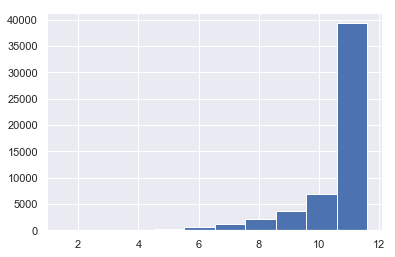

In [7]:
v.idf.hist()

#### (b) Setting max_features to 2500

In [8]:
vectorizer = TfidfVectorizer(use_idf=1, stop_words='english', token_pattern=r'[A-Za-z][A-Za-z][A-Za-z]+',max_features=2500)
X = vectorizer.fit_transform(rev_all.review.tolist())
v = pd.DataFrame(vectorizer.get_feature_names(), columns=['term_str'])
v['idf'] = vectorizer.idf_

In [9]:
v.sort_values('idf', ascending=False).sample(50)

,term_str,idf
101,appearance,7.771873
2298,trouble,6.149334
1488,npc,6.871086
1238,leave,5.884137
50,affect,7.278786
277,capabilities,7.667612
1642,polish,7.512047
15,accurate,7.073246
677,english,6.273919
2273,tough,7.252294


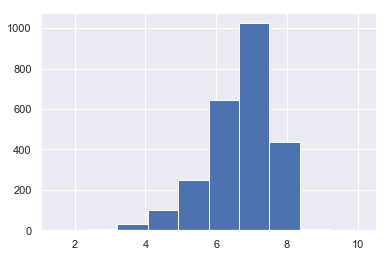

In [10]:
v.idf.hist()

#### Storing the reduced versions of the tokens,vocab tables and X_df(TFIDF feature set) 

In [11]:
my_v = v.term_str.tolist()

In [12]:
tokens_reduced = tokens[tokens.term_str.isin(my_v)]

In [13]:
vocab_reduced = vocab[vocab.term_str.isin(my_v)]

#### Converting the sparse matrix to a dataframe of word features

In [14]:
my_columns = vectorizer.get_feature_names()

In [133]:
tokens_reduced.to_csv('tokens_reduced_F4.csv',index=False)
vocab_reduced.to_csv('vocabs_reduced_F4.csv',index=False)
scipy.sparse.save_npz('TFIDF_sparse_F4.npz',X)
pd.DataFrame(my_columns).rename(columns={0:'term_str'}).to_csv('TFIDF_terms_F4.csv',index=False)